In [ ]:
!pip install ultralytics==8.0.28 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.6/272.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.1 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lp0MTLJfT7JwDGADAZeS")
project = rf.workspace("akshay-krishna-gie3b").project("inbreast-zzlbj")
dataset = project.version(2).download("yolov8")

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Ratinanet-Deep-learning-1 in yolov8:: 100%|██████████| 6372/6372 [00:00<00:00, 6707.74it/s]


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8s-seg.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 115MB/s]


In [ ]:
model.train(data="/content/datasets/Ratinanet-Deep-learning-1/data.yaml", epochs=100, optimizer= 'Adam', patience=10,
            cos_lr=True, lr0=1e-3, plots=True)

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/datasets/Ratinanet-Deep-learning-1/data.yaml, epochs=100, patience=5, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynami

In [ ]:
from IPython.display import Image

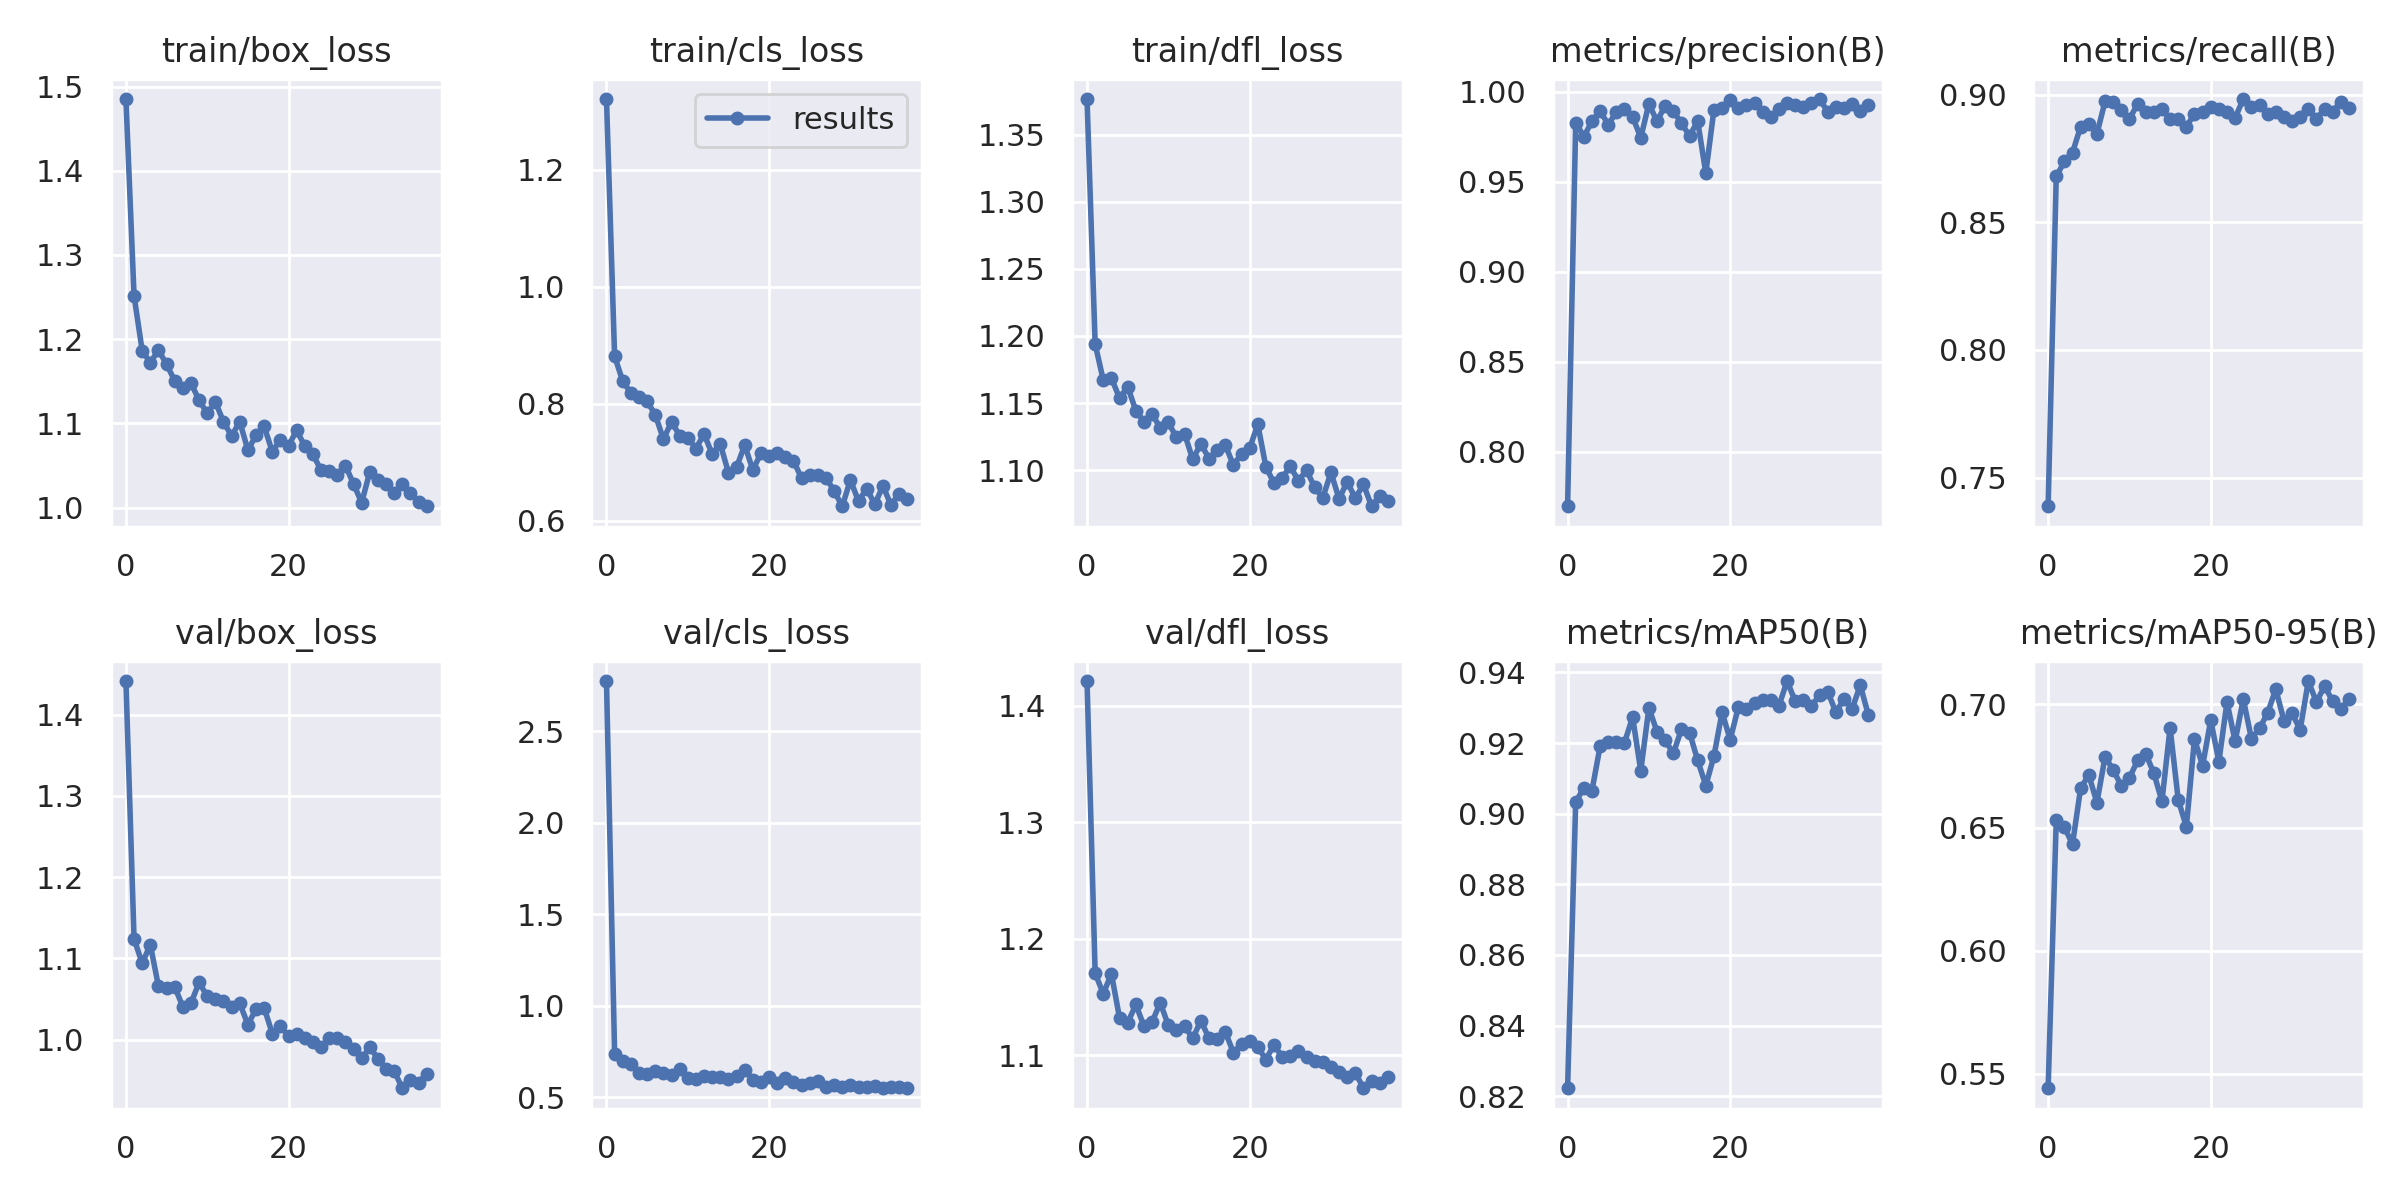

In [ ]:
Image('/content/runs/detect/train3/results.png')

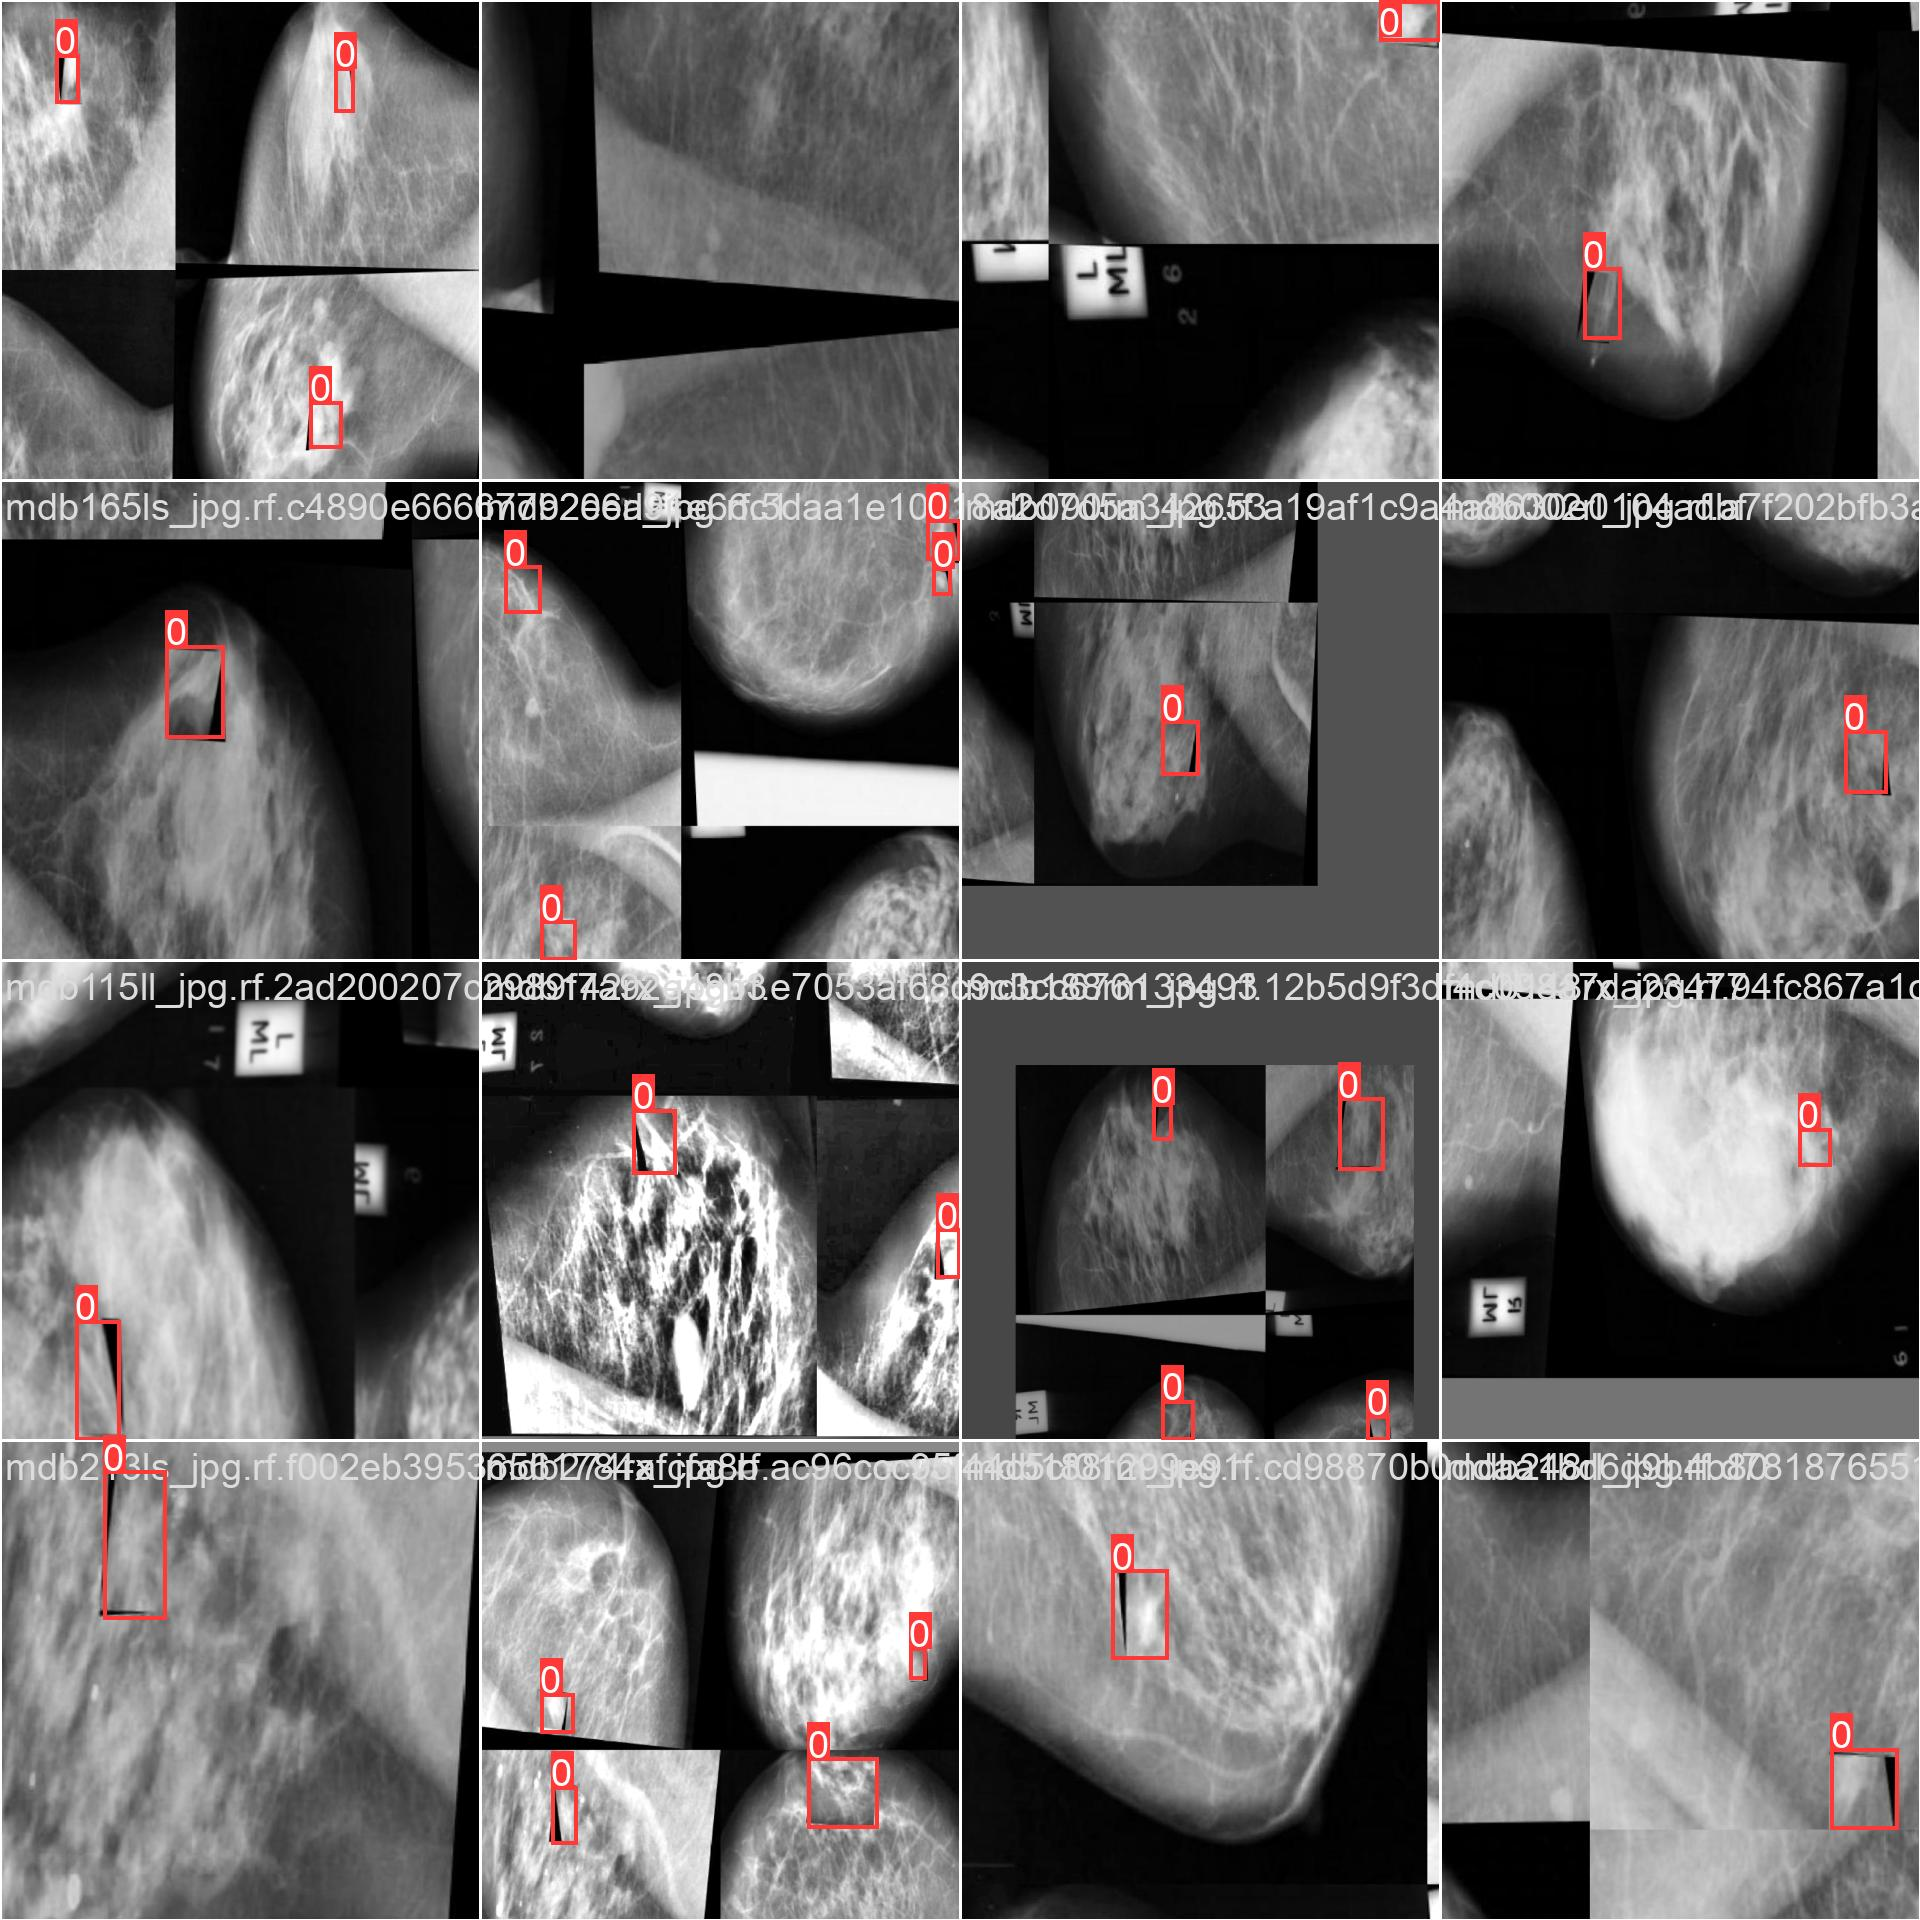

In [ ]:
Image('/content/runs/detect/train3/train_batch0.jpg')

In [ ]:
metrics = model.val()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Ratinanet-Deep-learning-1/valid/labels.cache... 986 images, 0 backgrounds, 0 corrupt: 100%|██████████| 986/986 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:15<00:00,  3.88it/s]
                   all        986       1022      0.989      0.894      0.935      0.711
Speed: 0.3ms pre-process, 4.0ms inference, 0.0ms loss, 2.0ms post-process per image


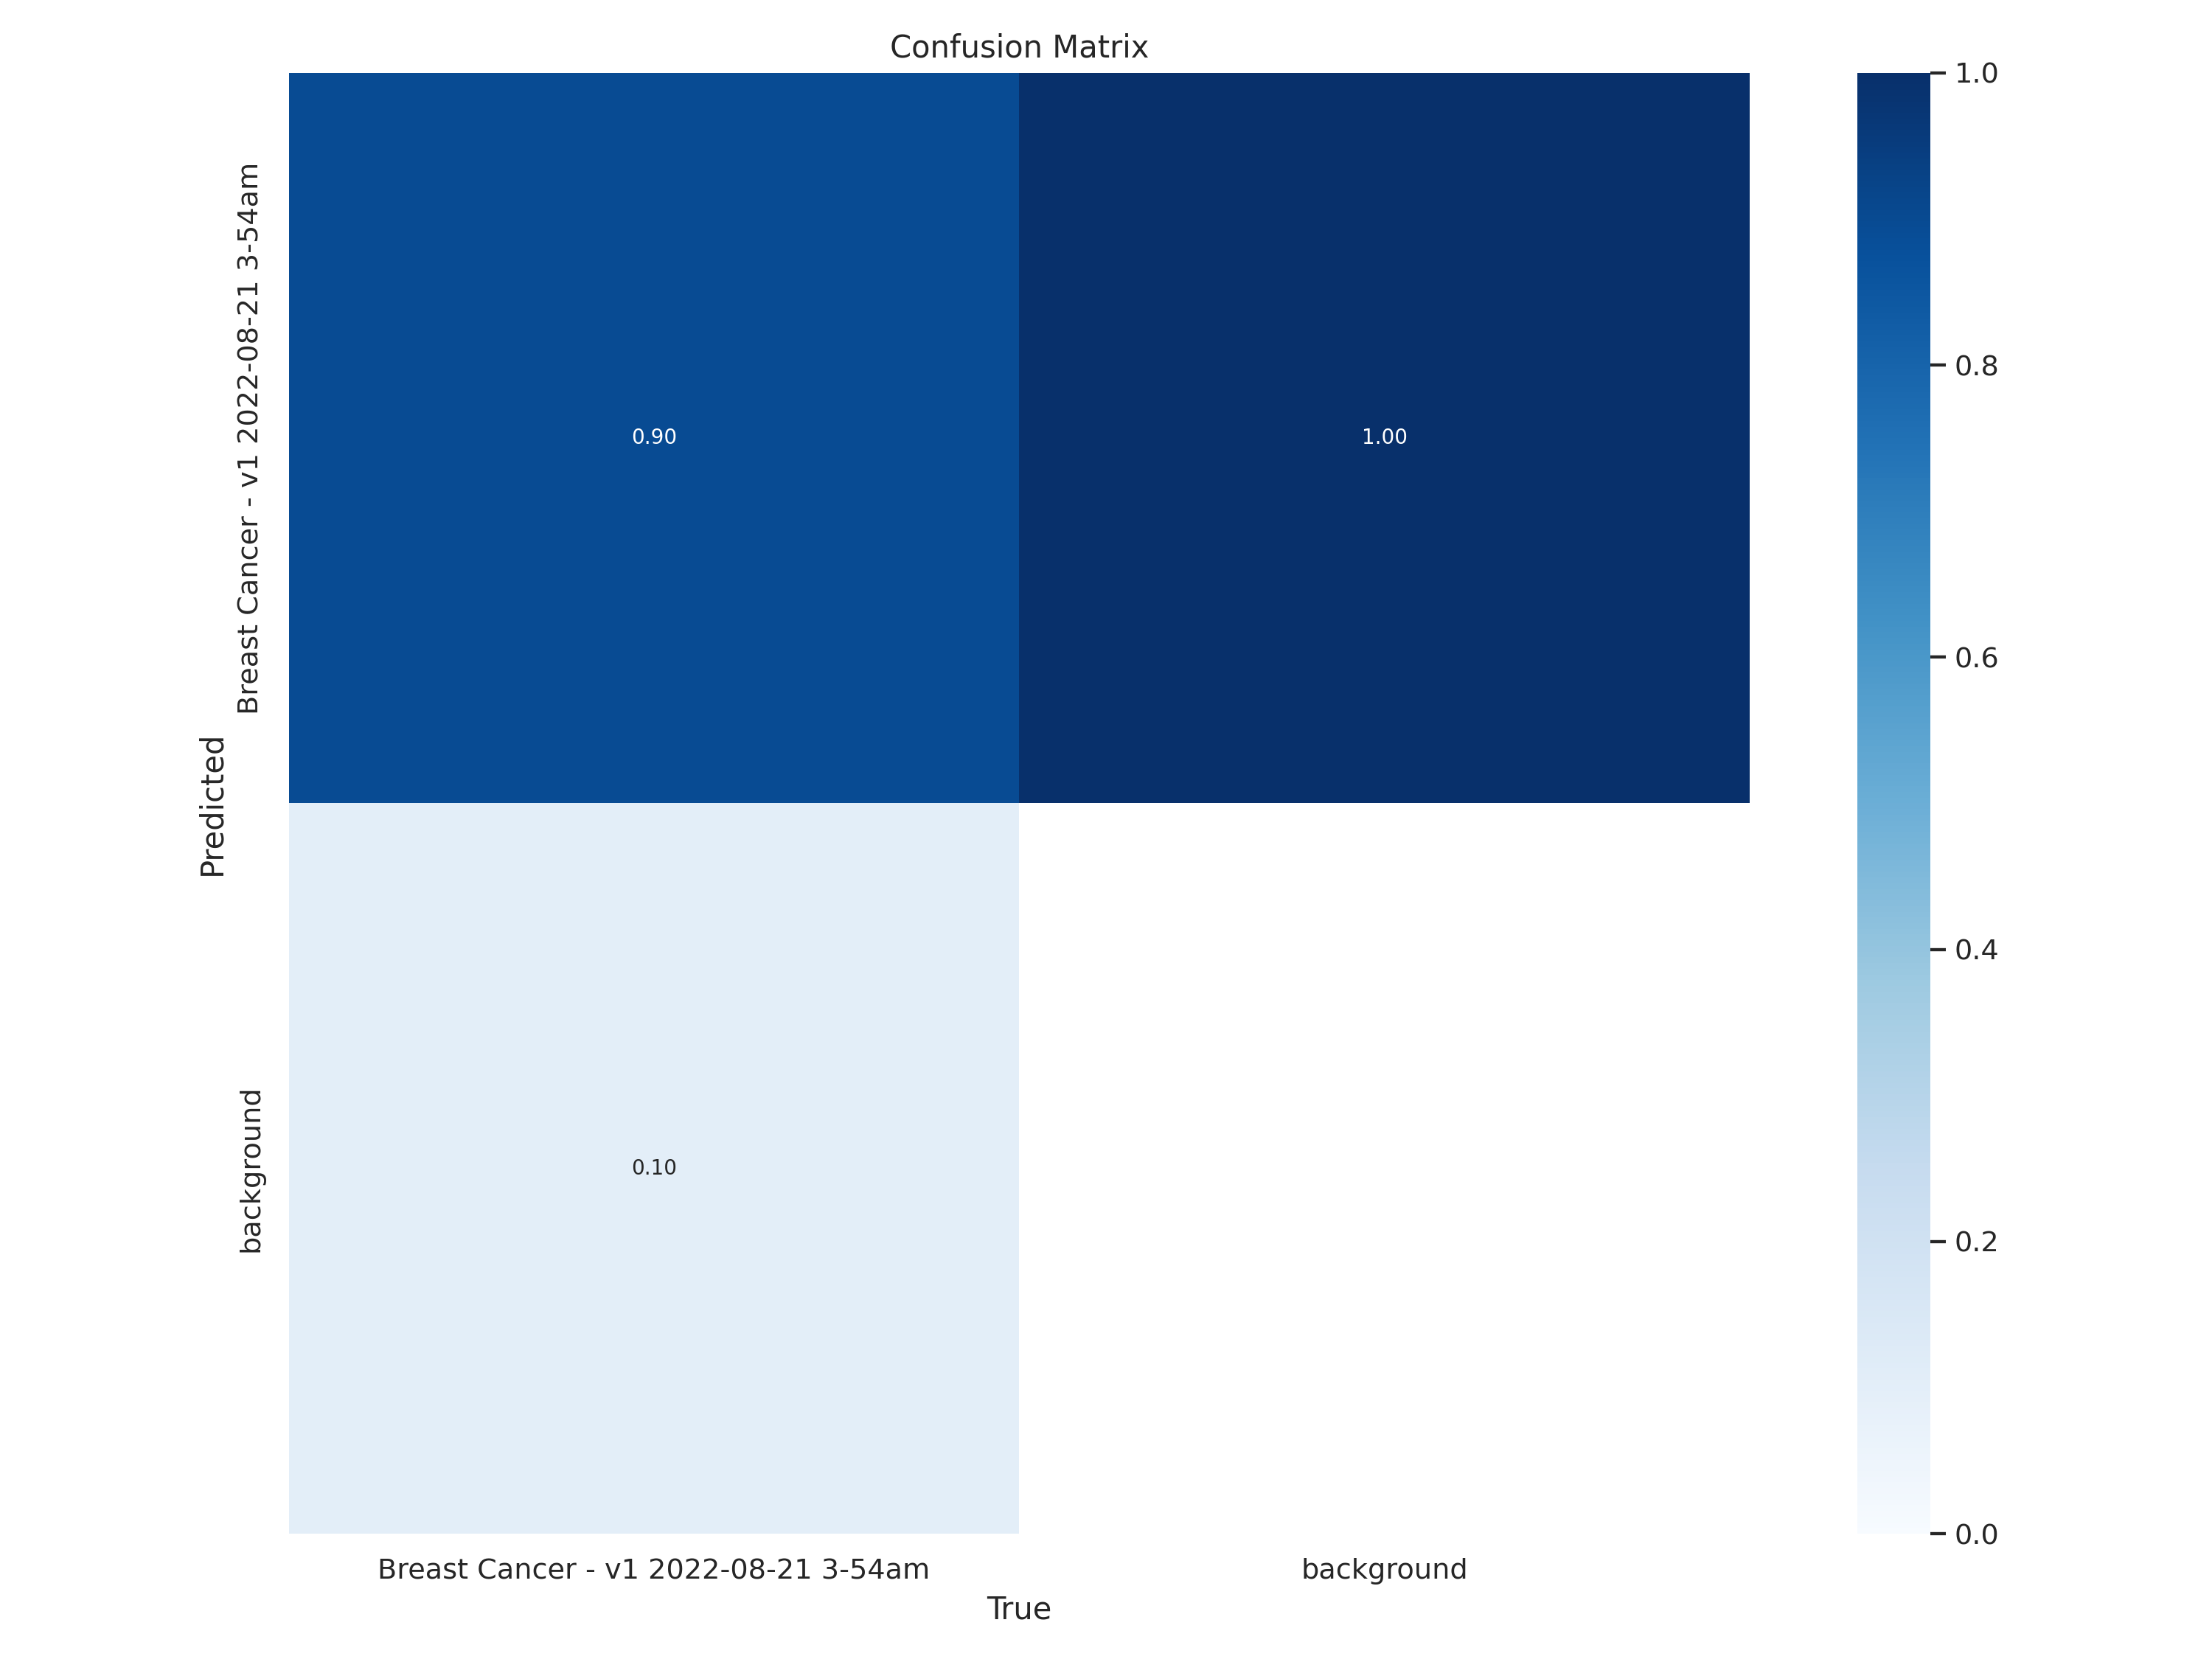

In [ ]:
Image('/content/runs/detect/val2/confusion_matrix.png')

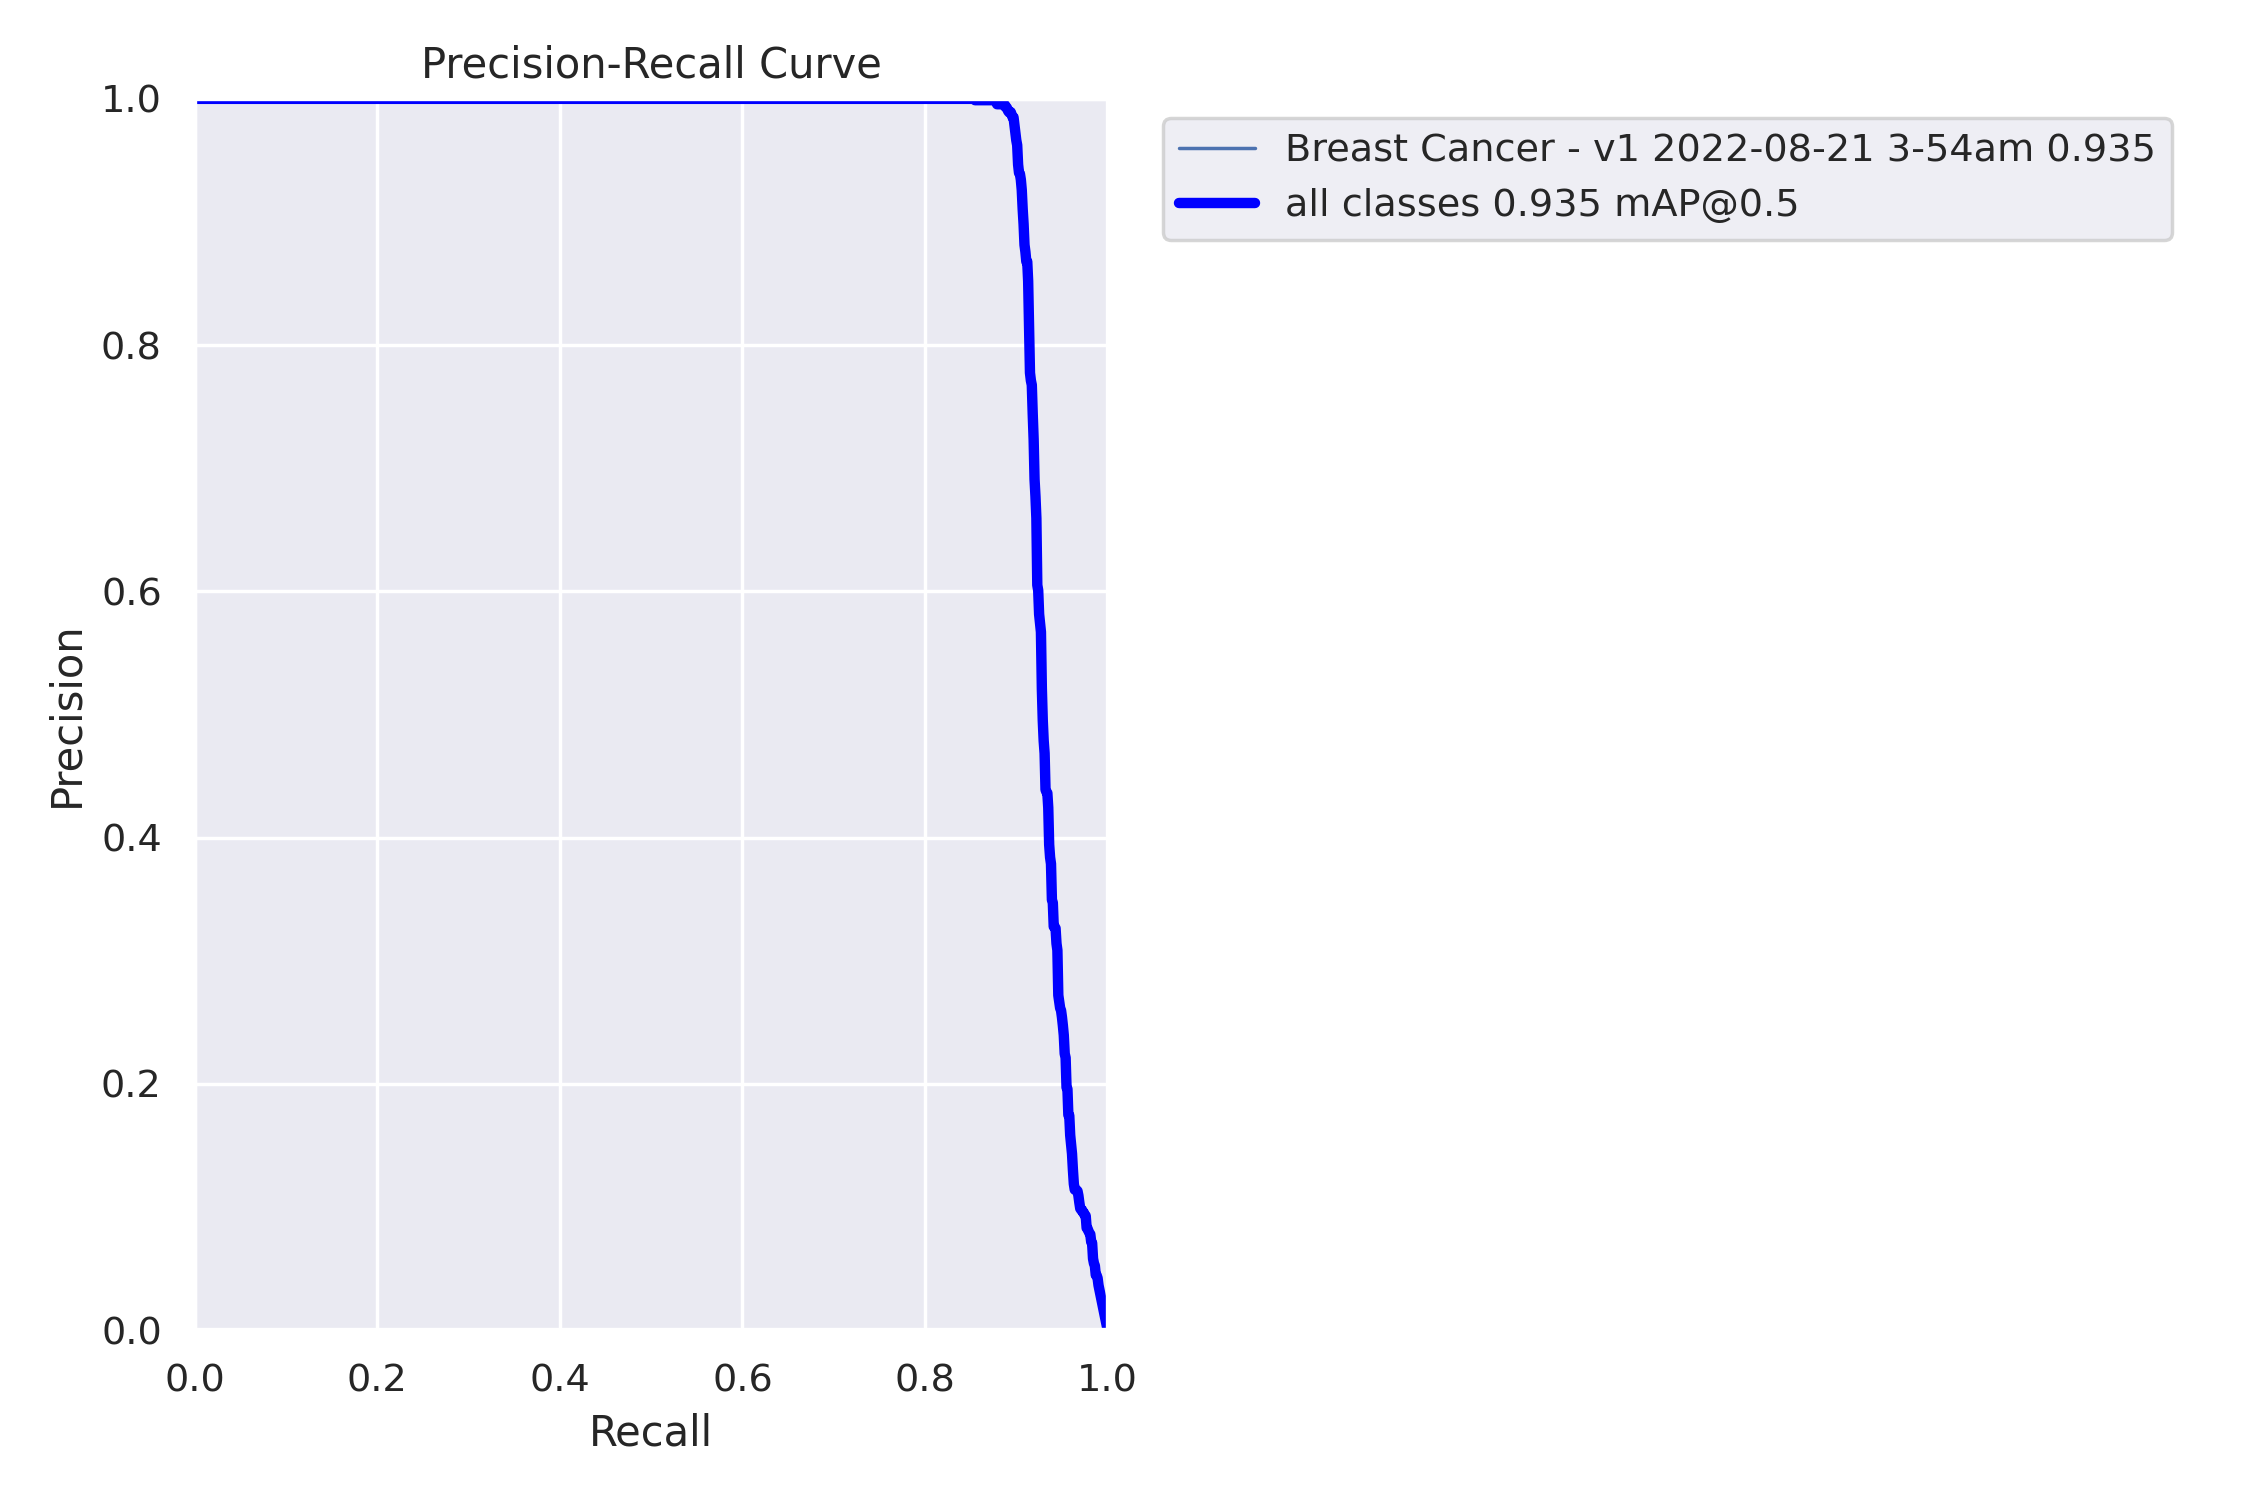

In [ ]:
Image('/content/runs/detect/val2/PR_curve.png')

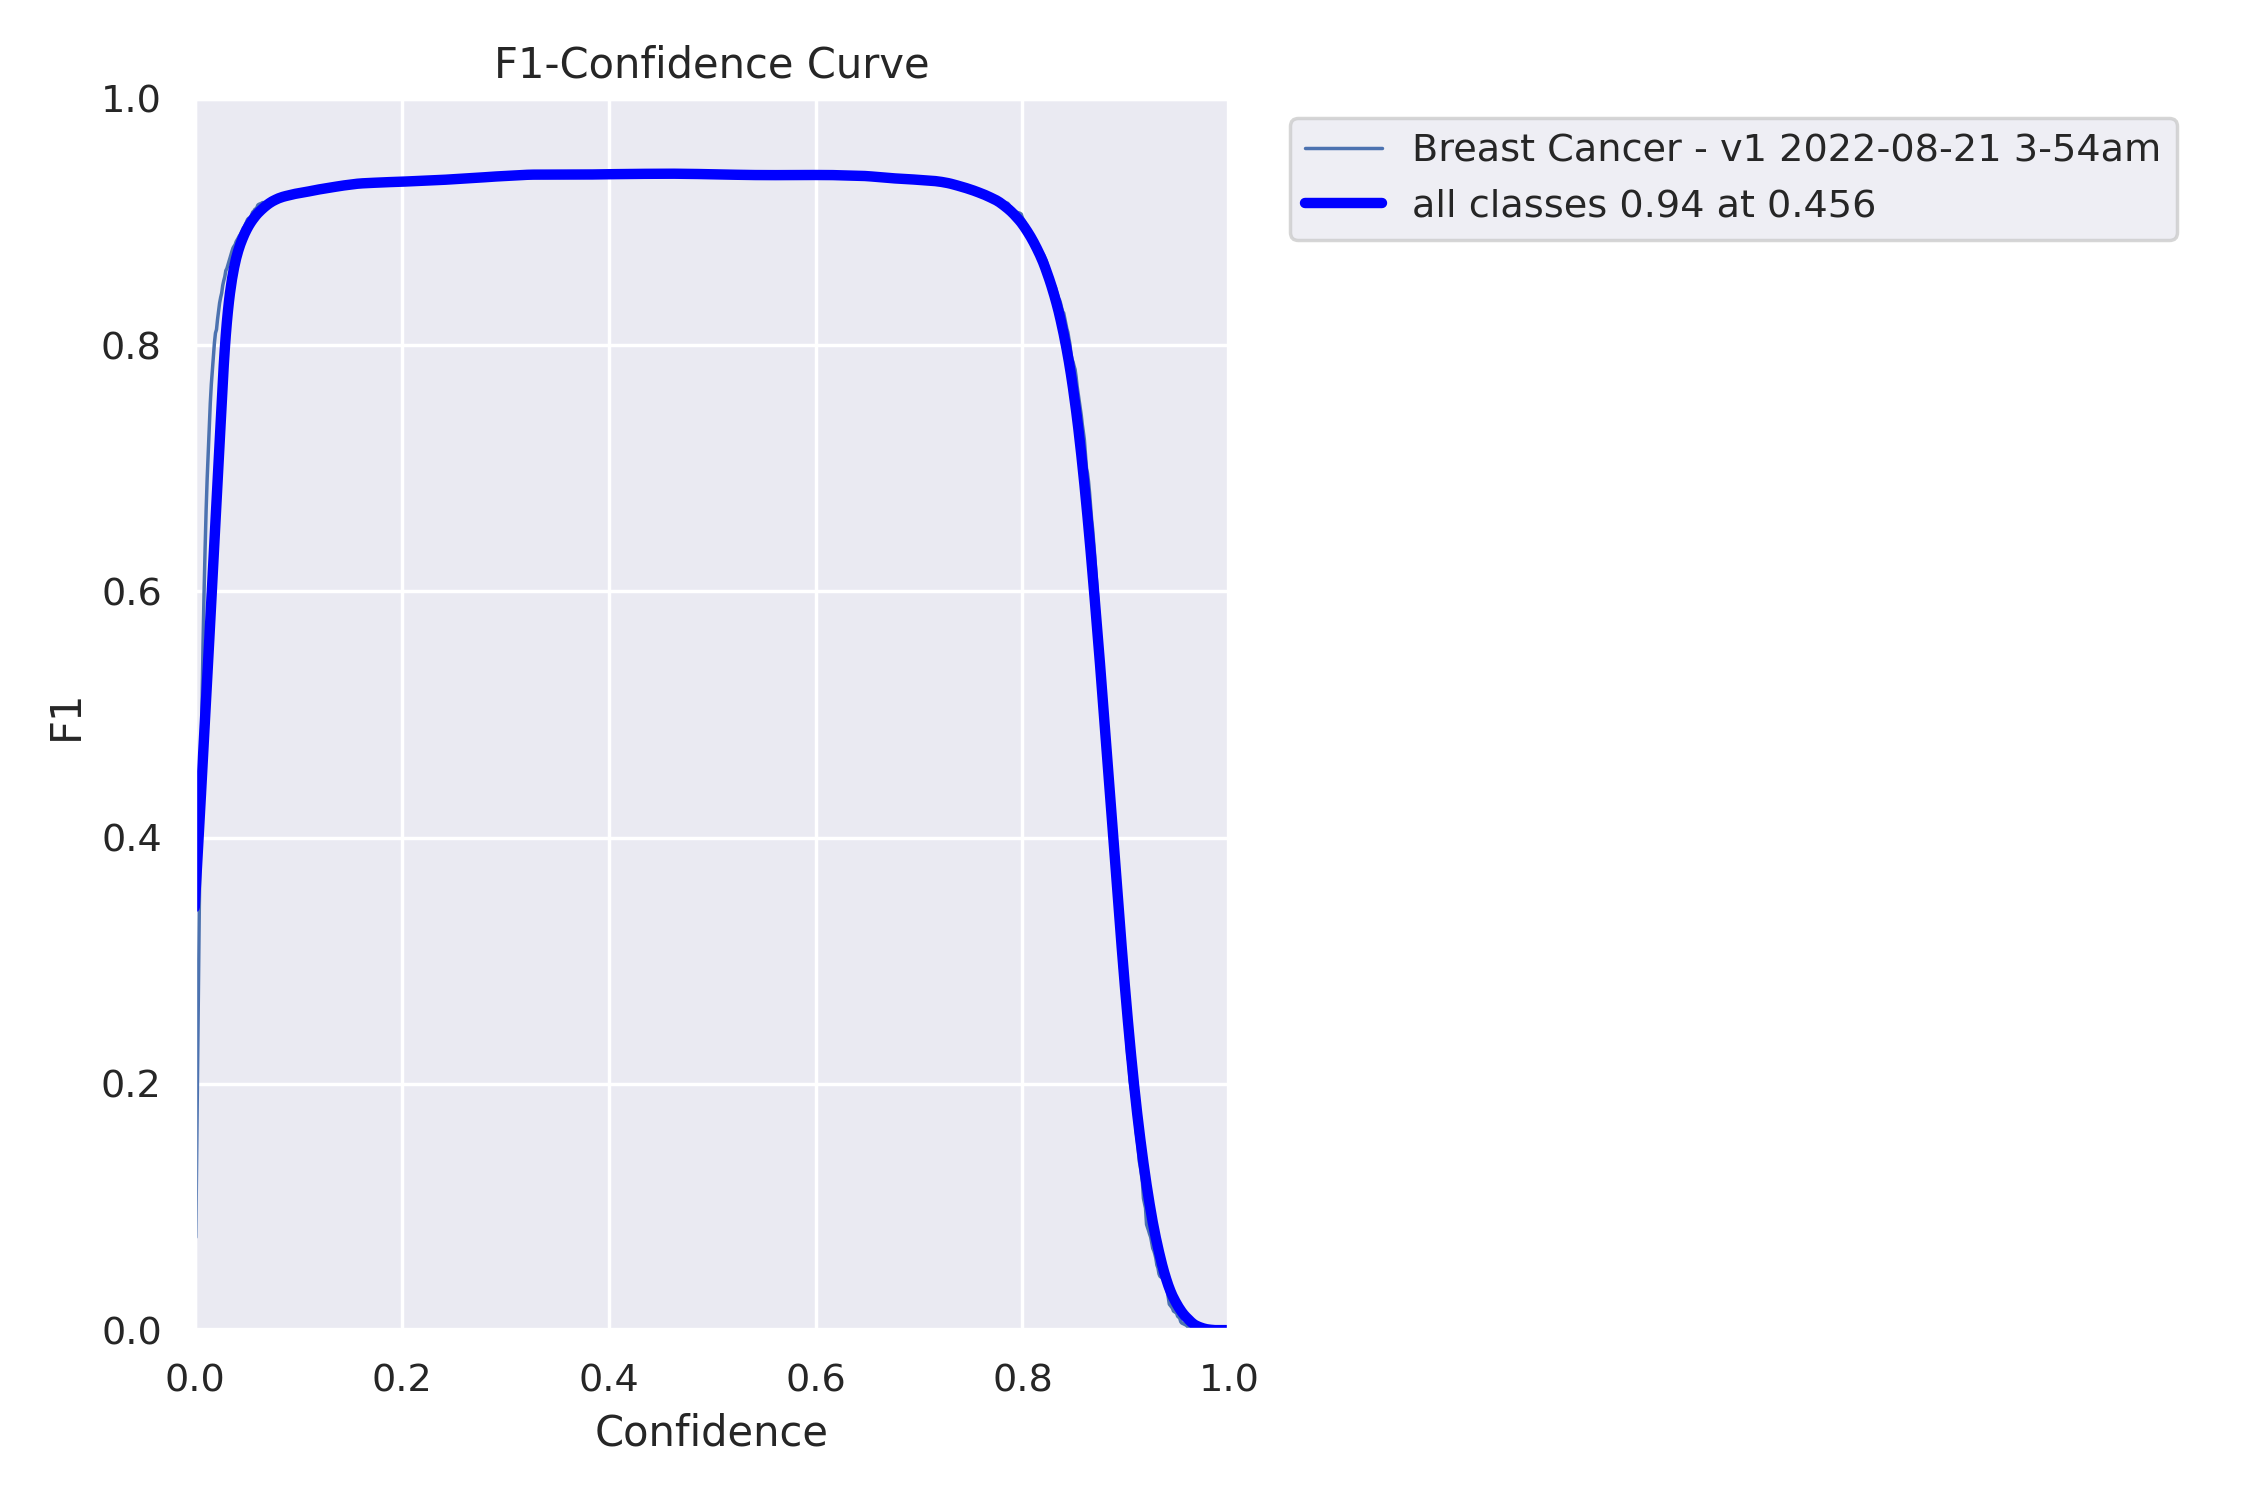

In [ ]:
Image('/content/runs/detect/val2/F1_curve.png')

In [ ]:
model.predict('/content/breast_1.jpg', save=True, imgsz=640, conf=0.05,
              hide_labels=True)


image 1/1 /content/breast_1.jpg: 640x576 1 Breast Cancer - v1 2022-08-21 3-54am, 13.7ms
Speed: 0.8ms pre-process, 13.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[2.90000e+01, 4.82000e+02, 6.10000e+01, 5.10000e+02, 8.49286e-02, 0.00000e+00]], device='cuda:0')]

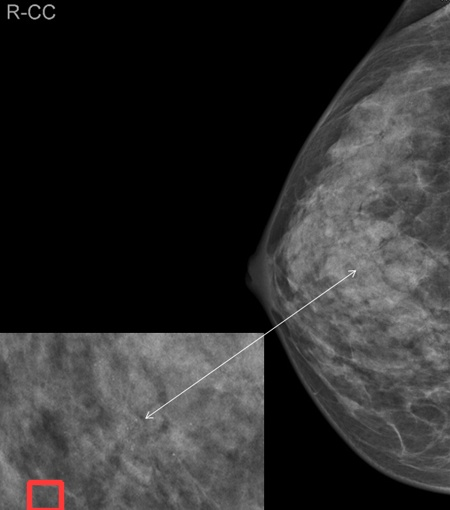

In [ ]:
Image('/content/runs/detect/predict/breast_1.jpg')

In [ ]:
model.predict('/content/breast_2.png', save=True, imgsz=640, conf=0.01,
              hide_labels=True)


image 1/1 /content/breast_2.png: 352x640 2 Breast Cancer - v1 2022-08-21 3-54ams, 9.1ms
Speed: 0.6ms pre-process, 9.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([2, 6])
 dtype: torch.float32
  + tensor([[7.70000e+02, 4.26000e+02, 8.49000e+02, 5.21000e+02, 1.53819e-02, 0.00000e+00],
         [4.46000e+02, 3.52000e+02, 5.12000e+02, 4.28000e+02, 1.21318e-02, 0.00000e+00]], device='cuda:0')]

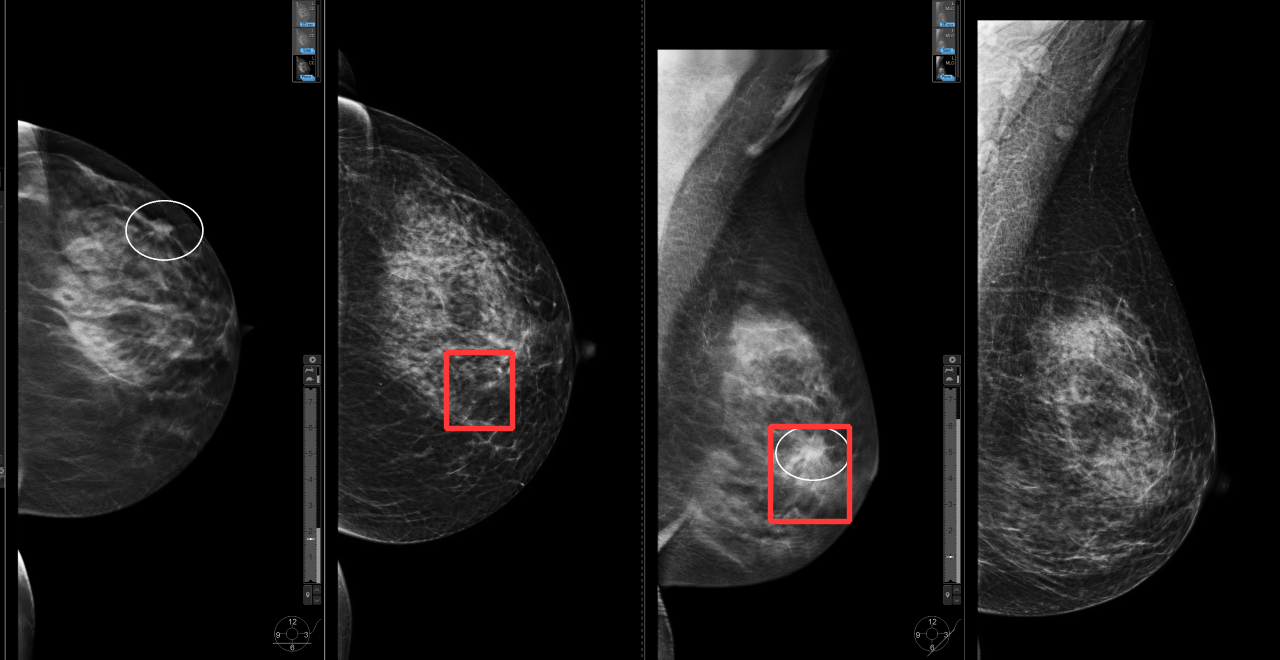

In [ ]:
Image('/content/runs/detect/predict/breast_2.png')

In [ ]:
model.predict('/content/breast_3.jpg', save=True, imgsz=640, conf=0.1,
              hide_labels=True)


image 1/1 /content/breast_3.jpg: 416x640 2 Breast Cancer - v1 2022-08-21 3-54ams, 37.5ms
Speed: 0.7ms pre-process, 37.5ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([2, 6])
 dtype: torch.float32
  + tensor([[114.00000, 125.00000, 154.00000, 170.00000,   0.54401,   0.00000],
         [117.00000, 134.00000, 154.00000, 173.00000,   0.22033,   0.00000]], device='cuda:0')]

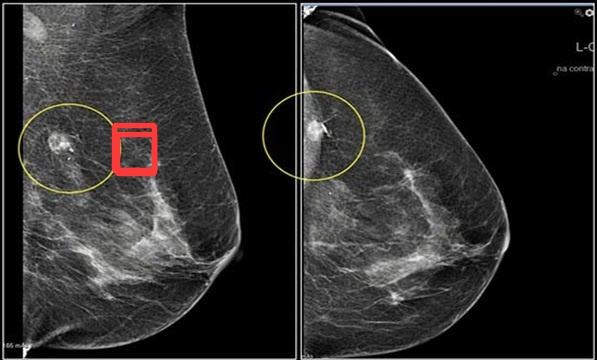

In [ ]:
Image('/content/runs/detect/predict/breast_3.jpg')

In [ ]:
model.predict('/content/breast_4.jpg', save=True, imgsz=640, conf=0.2,
              hide_labels=True)


image 1/1 /content/breast_4.jpg: 640x640 3 Breast Cancer - v1 2022-08-21 3-54ams, 43.5ms
Speed: 0.8ms pre-process, 43.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([3, 6])
 dtype: torch.float32
  + tensor([[5.10000e+01, 5.38000e+02, 1.24000e+02, 6.31000e+02, 2.45153e-01, 0.00000e+00],
         [7.33000e+02, 1.00500e+03, 7.93000e+02, 1.04900e+03, 2.35920e-01, 0.00000e+00],
         [6.12000e+02, 1.00000e+03, 7.90000e+02, 1.05000e+03, 2.08694e-01, 0.00000e+00]], device='cuda:0')]

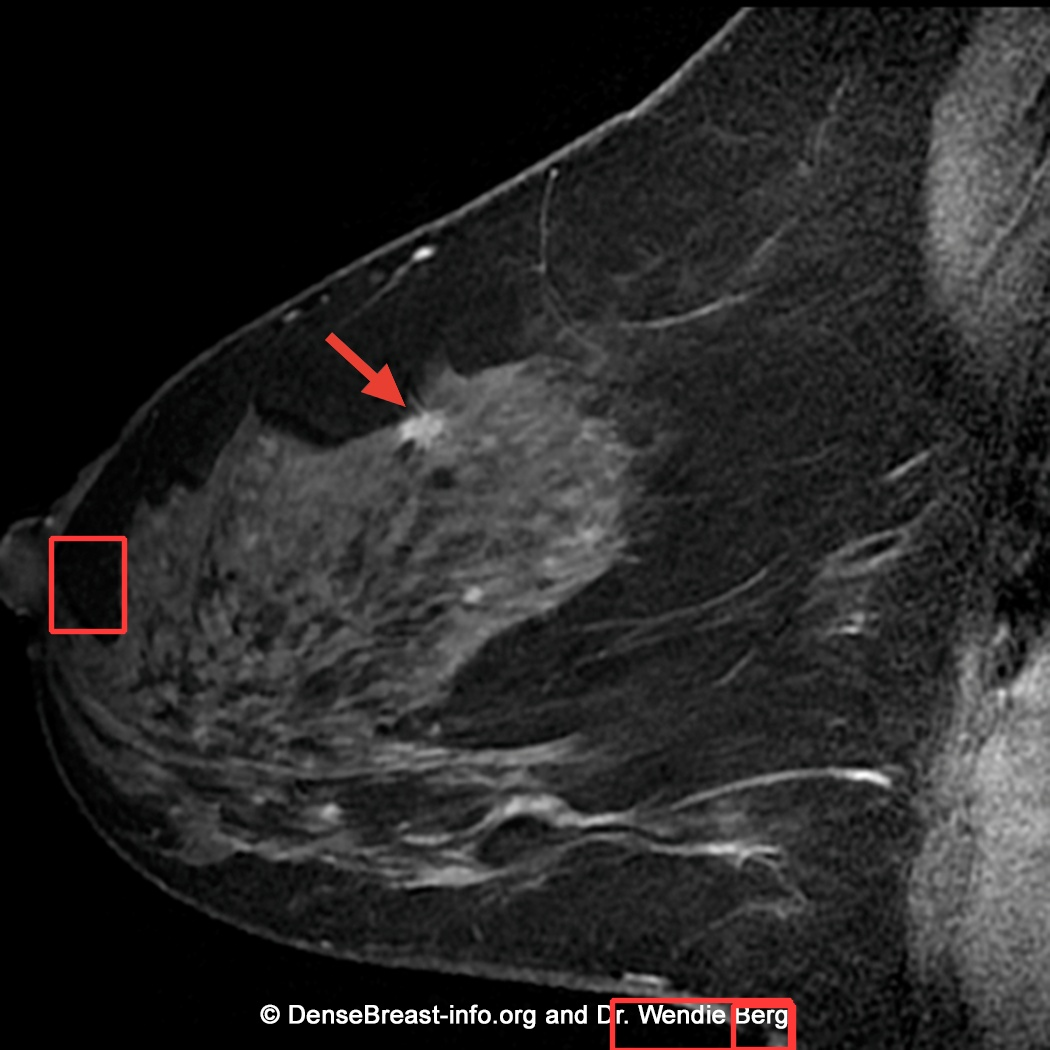

In [ ]:
Image('/content/runs/detect/predict/breast_4.jpg')

In [ ]:
model.predict('/content/breast_5.jpg', save=True, imgsz=640, conf=0.1,
              hide_labels=True)


image 1/1 /content/breast_5.jpg: 544x640 3 Breast Cancer - v1 2022-08-21 3-54ams, 14.2ms
Speed: 0.8ms pre-process, 14.2ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([3, 6])
 dtype: torch.float32
  + tensor([[3.00000e+00, 2.23000e+02, 1.49000e+02, 4.92000e+02, 4.54459e-01, 0.00000e+00],
         [0.00000e+00, 1.20000e+03, 7.90000e+01, 1.56900e+03, 1.80033e-01, 0.00000e+00],
         [1.62000e+02, 2.56000e+02, 3.04000e+02, 4.61000e+02, 1.23348e-01, 0.00000e+00]], device='cuda:0')]

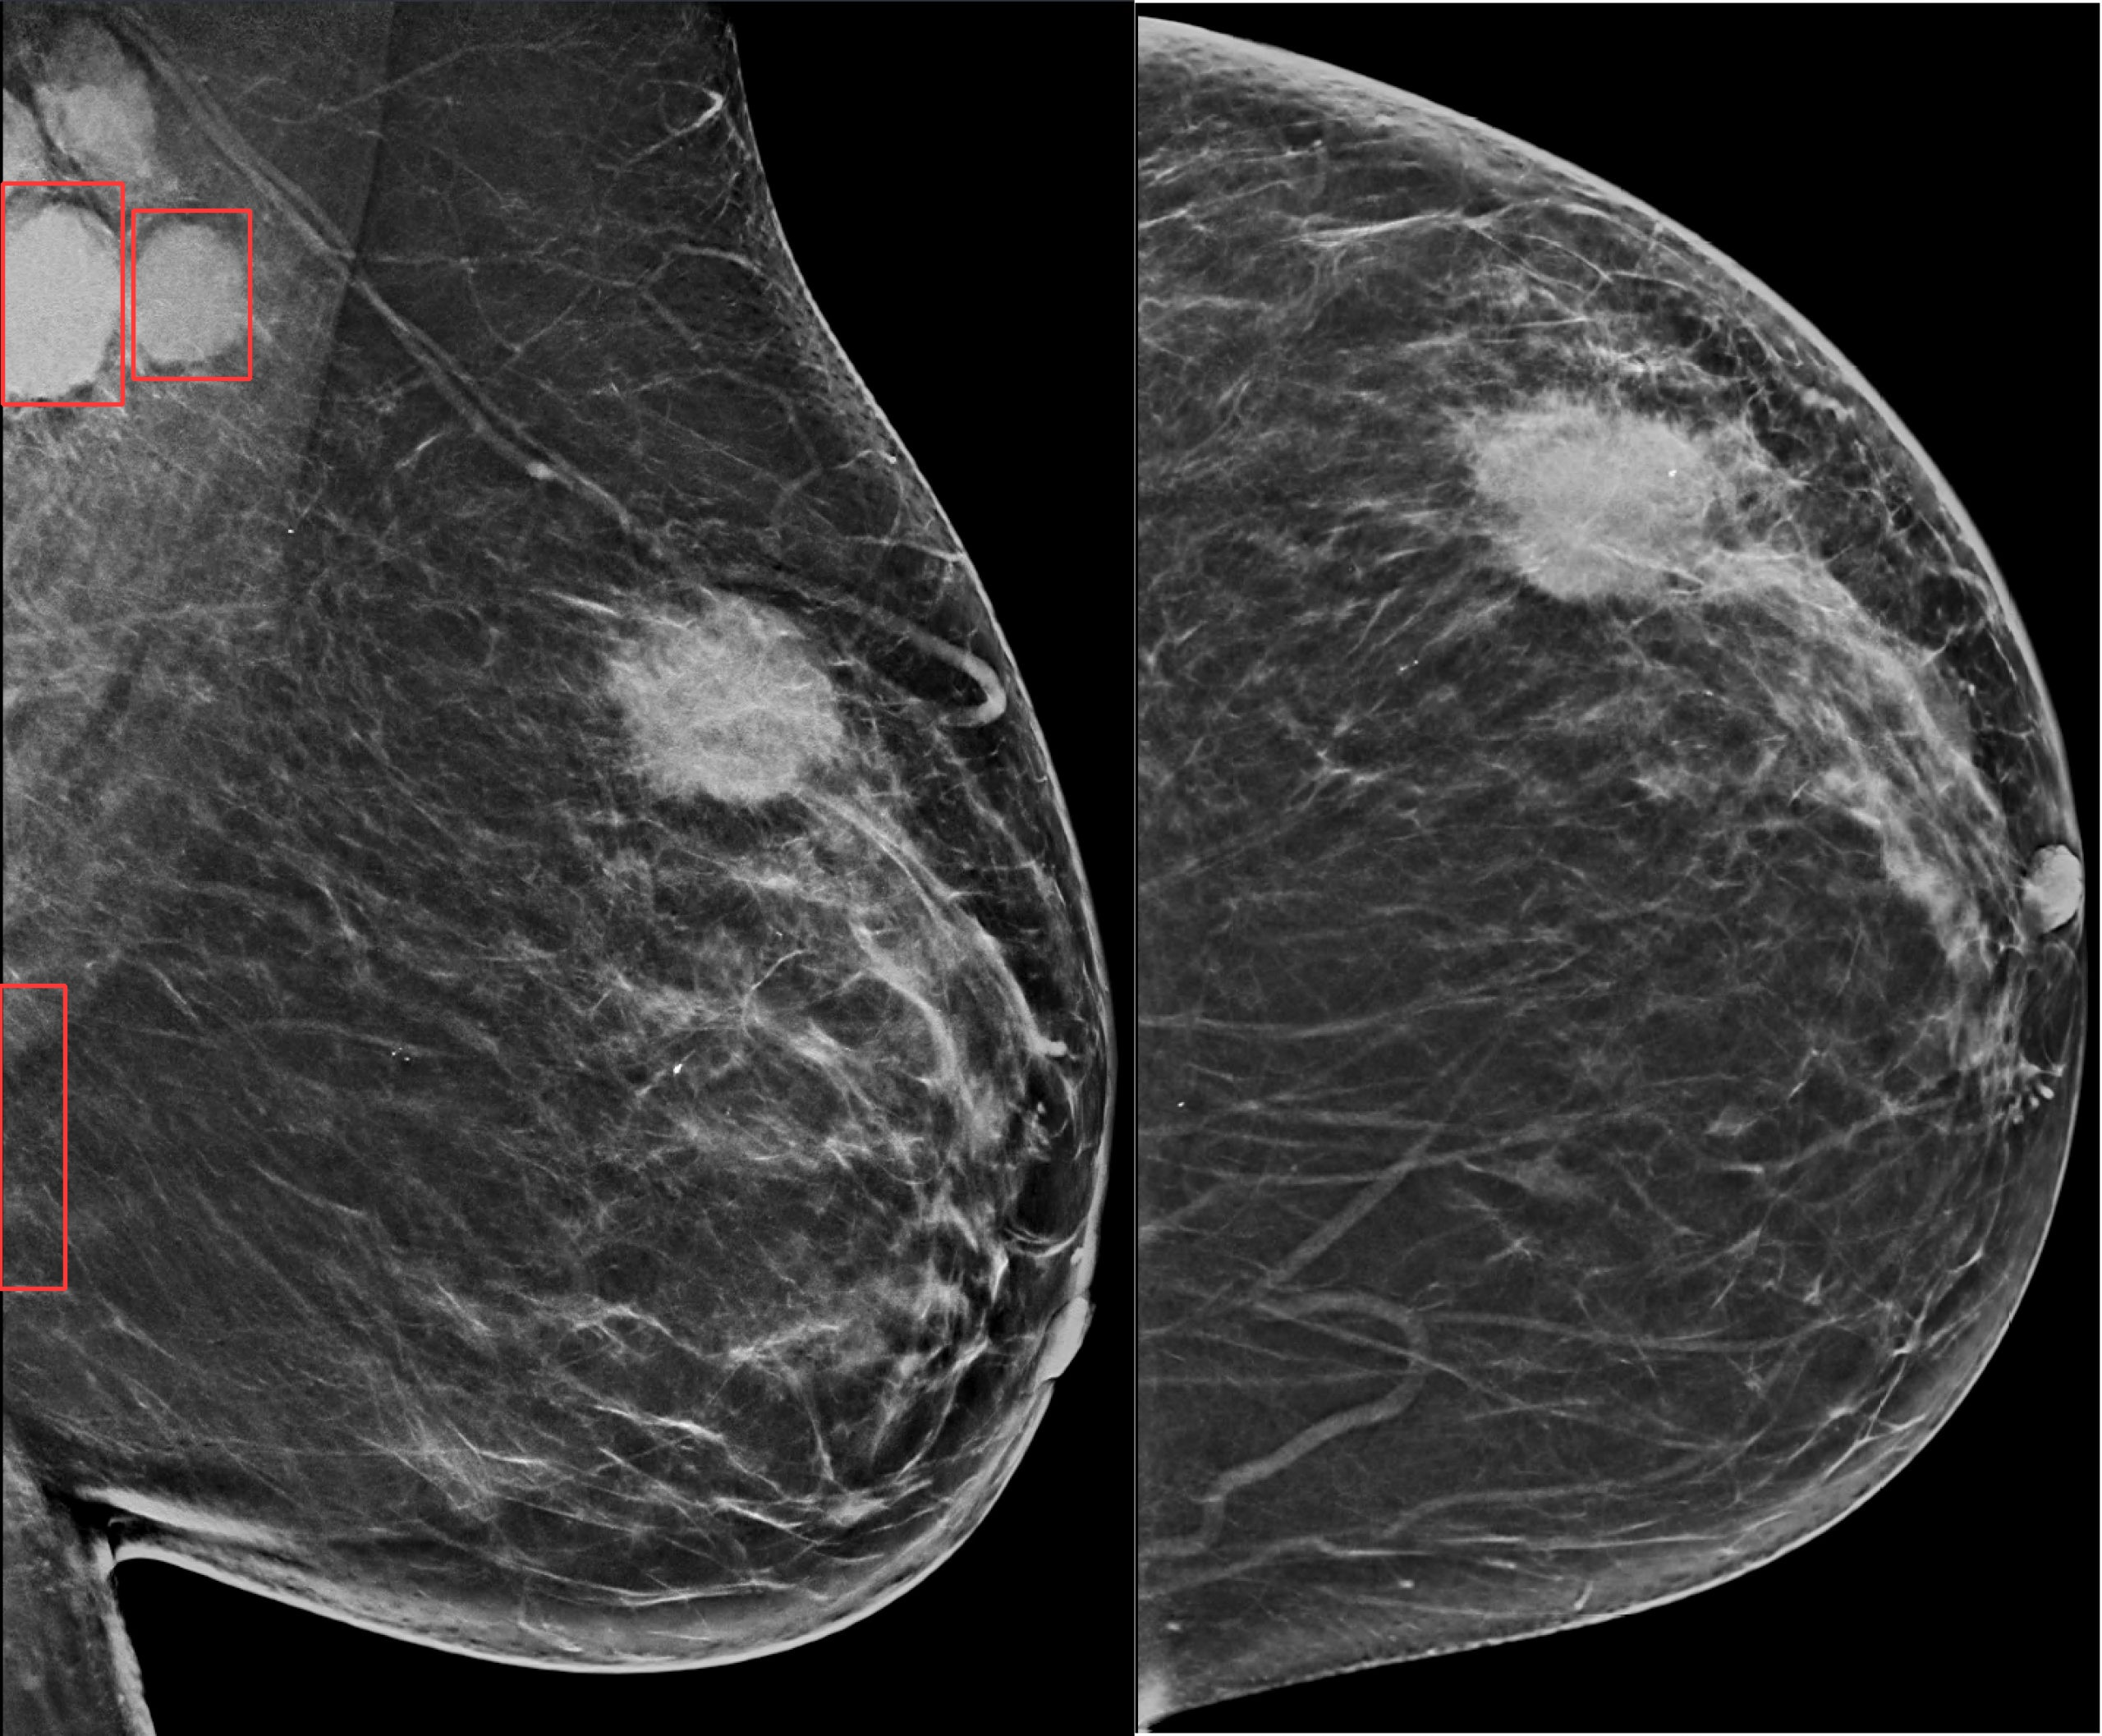

In [ ]:
Image('/content/runs/detect/predict/breast_5.jpg')

На датасете результаты хорошие. На реальных примерах полная лажа!

Вероятнее всего, в датасете не было примеров рака в плотных областях. На других датасетах результаты получше)